時刻１の潜在変数の状態 [0, 0, 1, 1]
状態の最小化結果 ['0.33', '0.33', '0.67', '0.67']
状態の離散化 ['0.00', '0.00', '1.00', '1.00']
ave 70.0
item [178.51134356654595, 75.61178952956, 16.45921384321374, 18.62521726400399, 7.330520537154205, 7.050464447672843, 7.785104078048687, 3.181409091707386]
item [183.96817302025323, 76.28247772023575, 14.756255722836434, 17.045196069385597, 100001.21717205904, 99999.64841444492, 99998.94041851164, 99998.4187225832]
x_1 [183.96817302025323, 76.28247772023575, 14.756255722836434, 17.045196069385597, 100001.21717205904, 99999.64841444492, 99998.94041851164, 99998.4187225832]


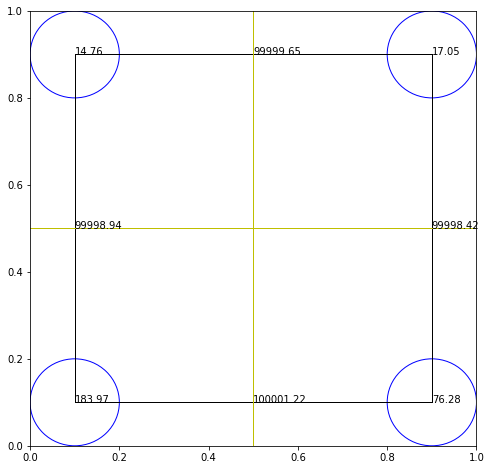

z_2 [0, 0, 0, 0]
状態の最小化結果 ['-0.00', '-0.00', '0.00', '0.00']
状態の離散化 ['0.00', '0.00', '0.00', '0.00']
ave 70.0
item [194.98754028617458, 65.49971712360636, 8.854216867390019, 11.303476748174694, 9.181293690688808, 2.598484932829191, 6.004638674692566, 3.6529597016685376]
item [195.9875036276697, 66.49967754227801, 8.854178487140894, 11.303502649376586, 99999.99998915193, 100000.00006891966, 100000.00000651515, 99999.99999404099]
x_2 [195.9875036276697, 66.49967754227801, 8.854178487140894, 11.303502649376586, 99999.99998915193, 100000.00006891966, 100000.00000651515, 99999.99999404099]


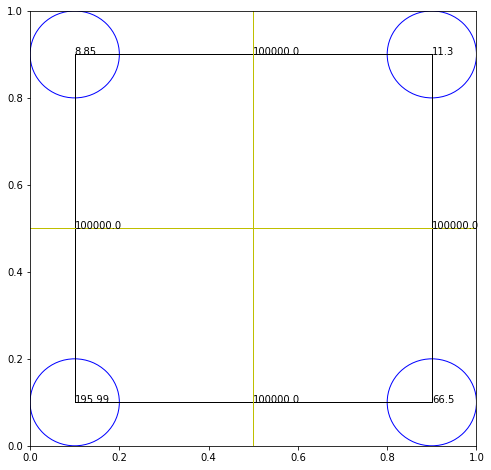

In [3]:
# -*- coding: utf-8 -*-
#!/usr/bin/env python
import sys, json
import numpy as np
import pandas as pd
np.random.seed(21212)
import random
from syokiti import Syokiti
from minimize_risan import Minimize_risan
from minimize_renzoku import Minimize_renzoku
from mrf_plot import Mrf_plot
from init_state import Init_state

import MRF_PLOT1
import imp
imp.reload(MRF_PLOT1)

#x*yのマルコフモデル
x = 2
y = 2
z = x*(y-1)+y*(x-1)
#重み（w0:高精度、w1:低精度、w2:隣接）
w0=3
w1=2
w2=0.5
#ラインププロセスの閾値
c = 100
#状態
state = [0,1]
#状態の辞書
opt = {state[0]:{'mu':0,'sigma':10},state[1]:{'mu':200,'sigma':10}}

if __name__ == '__main__':
    node = [0,0,0,0]
    ob_variables = [0,0,1,1]
    state = [0,1]
    #ob_variables = random.choices(state,k=4)
    print('時刻１の潜在変数の状態',ob_variables)
    
    #Z_1は１時刻目の潜在変数
    senzai_risan_minimize=Minimize_risan(x,y,node,ob_variables,state)
    z_1 = senzai_risan_minimize.risan()
    
    #潜在変数の状態から上層部のマルコフ
    low_node=[200,None,5,5]
    high_node=[200,None,5,5]
    Line = [0]*z
    SIN_node = [20,20,20,20]
    SENZAI_node = SIN_node + Line
    syokiSENZAI_node = SIN_node + Line
    
    #初期値設定(高精度あり)
    syokika = Syokiti(x,y,low_node,high_node,SIN_node,Line)
    SENZAI_node = syokika.default()
    
    #低精度のみの推定と，高精度を含んだ推定  
    marcov_lineprocess_minimize=Minimize_renzoku(x,y,SENZAI_node,low_node,high_node,w0,w1,w2,c,Line,opt,z_1)
    x_1 =marcov_lineprocess_minimize.ENEGY()
    print('x_1',x_1) 
    
    #描画
    PLOT = Mrf_plot(x_1,x,y)
    PLOT.MRF_PLOT()
    
    
    
    #状態遷移
    PROB_MATRIX = [[0.7, 0.3],
                   [0.2, 0.8,]]
    move_state=Init_state(PROB_MATRIX ,z_1)
    z_2 = move_state.state()
    print('z_2',z_2)
    
    #Z_2は１時刻目の潜在変数
    senzai_risan_minimize=Minimize_risan(x,y,node,z_2,state)
    z_2 = senzai_risan_minimize.risan()
    
    #潜在変数の状態から上層部のマルコフ
    z = x*(y-1)+y*(x-1)
    low_node=[200,None,5,5]
    high_node=[200,None,5,5]
    Line = [0]*z
    SIN_node = [20,20,20,20]
    SENZAI_node = SIN_node + Line
    syokiSENZAI_node = SIN_node + Line
    
    #初期値設定(高精度あり)
    syokika = Syokiti(x,y,low_node,high_node,SIN_node,Line)
    SENZAI_node = syokika.default()
    
    #低精度のみの推定と，高精度を含んだ推定  
    marcov_lineprocess_minimize=Minimize_renzoku(x,y,SENZAI_node,low_node,high_node,w0,w1,w2,c,Line,opt,z_2)
    x_2 =marcov_lineprocess_minimize.ENEGY()
    print('x_2',x_2) 
    
    #描画
    PLOT = Mrf_plot(x_2,x,y)
    PLOT.MRF_PLOT()
    
    
